# Decision Tree Surrogate Explainer Demo

This example demonstrates how to interpret a **Scikit-learn** model using
the H2O Sonar library and plot **decision tree**.

In [1]:
import logging

import pandas
import webbrowser

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons, explainers
from h2o_sonar.explainers.dt_surrogate_explainer import DecisionTreeSurrogateExplainer
from h2o_sonar.lib.api.models import ModelApi

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
results_location = "../../results"

# dataset
dataset_path = "../../data/creditcard.csv"
target_col = "default payment next month"
df = pandas.read_csv(dataset_path)
(X, y) = df.drop(target_col, axis=1), df[target_col]

In [3]:
# parameters
interpret.describe_explainer(DecisionTreeSurrogateExplainer)

{'id': 'h2o_sonar.explainers.dt_surrogate_explainer.DecisionTreeSurrogateExplainer',
 'name': 'DecisionTreeSurrogateExplainer',
 'display_name': 'Surrogate Decision Tree',
 'description': 'The surrogate decision tree is an approximate overall flow chart of the model, created by training a simple decision tree on the original inputs and the predictions of the model.',
 'model_types': ['iid', 'time_series'],
 'can_explain': ['regression', 'binomial', 'multinomial'],
 'explanation_scopes': ['global_scope', 'local_scope'],
 'explanations': [{'explanation_type': 'global-decision-tree',
   'name': 'GlobalDtExplanation',
   'category': None,
   'scope': 'global',
   'has_local': None,
   'formats': []},
  {'explanation_type': 'local-decision-tree',
   'name': 'LocalDtExplanation',
   'category': None,
   'scope': 'local',
   'has_local': None,
   'formats': []}],
 'parameters': [{'name': 'debug_residuals',
   'description': 'Debug model residuals.',
   'comment': '',
   'type': 'bool',
   'va

## Interpret

In [4]:
# scikit-learn model
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X, y)

# explainable model
model = ModelApi().create_model(target_col=target_col, model_src=gradient_booster, used_features=X.columns.to_list())

interpretation = interpret.run_interpretation(
    dataset=df,
    model=model,
    target_col=target_col,
    results_location=results_location,
    log_level=logging.INFO,
    explainers=[
        commons.ExplainerToRun(
            explainer_id=DecisionTreeSurrogateExplainer.explainer_id(),
            params="",
        )
    ]
)

Checking whether there is an H2O instance running at http://localhost:59443 .

/home/srasaratnam/projects/h2o-sonar/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


.... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /home/srasaratnam/projects/h2o-sonar/venv/lib/python3.8/site-packages/hmli/backend/bin/hmli.jar
  Ice root: /tmp/tmplwjtt0my
  JVM stdout: /tmp/tmplwjtt0my/hmli_srasaratnam_started_from_python.out
  JVM stderr: /tmp/tmplwjtt0my/hmli_srasaratnam_started_from_python.err
  Server is running at http://127.0.0.1:59443
Connecting to H2O server at http://127.0.0.1:59443 ... successful.


--------------------------  ----------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/Toronto
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    1 year, 2 months and 19 days !!!
H2O_cluster_name:           H2O_from_python_srasaratnam_cd8dkd
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:59443
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         XGBoost, Algos, MLI, MLI-Driver, Core V3, Core V4, TargetEncoder
Python_version:             3.8.10 final
--------------------------  ----------------------------------------------------------------

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
2023-03-12 23:09:42,200 - h2o_sonar.explainers.dt_surrogate_explainer.DecisionTreeSurrogateExplainerLogger - INFO - Surrogate decision tree 1753602f-35f6-40ef-b62f-7a2e5241fb6c/4900ed82-8ead-4191-be69-8dd239704409: connecting to H2O-3 server: localhost:59443


Connecting to H2O server at http://localhost:59443 ... successful.


--------------------------  ----------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/Toronto
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    1 year, 2 months and 19 days !!!
H2O_cluster_name:           H2O_from_python_srasaratnam_cd8dkd
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:59443
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         XGBoost, Algos, MLI, MLI-Driver, Core V3, Core V4, TargetEncoder
Python_version:             3.8.10 final
--------------------------  ----------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |

Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.


██████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |

2023-03-12 23:09:45,561 - h2o_sonar.explainers.dt_surrogate_explainer.DecisionTreeSurrogateExplainerLogger - INFO - Surrogate decision tree 1753602f-35f6-40ef-b62f-7a2e5241fb6c/4900ed82-8ead-4191-be69-8dd239704409: DONE calculation


██████████████████████████████████████████████████████████| (done) 100%
H2O session _sid_ab77 closed.


## Interact with the Explainer Result

In [5]:
# retrieve the result
result = interpretation.get_explainer_result(DecisionTreeSurrogateExplainer.explainer_id())

# result.data() method is not supported in this explainer

In [6]:
# open interpretation HTML report in web browser
webbrowser.open(interpretation.result.get_html_report_location())

True

In [7]:
# summary
result.summary()

{'id': 'h2o_sonar.explainers.dt_surrogate_explainer.DecisionTreeSurrogateExplainer',
 'name': 'DecisionTreeSurrogateExplainer',
 'display_name': 'Surrogate Decision Tree',
 'description': 'The surrogate decision tree is an approximate overall flow chart of the model, created by training a simple decision tree on the original inputs and the predictions of the model.',
 'model_types': ['iid', 'time_series'],
 'can_explain': ['regression', 'binomial', 'multinomial'],
 'explanation_scopes': ['global_scope', 'local_scope'],
 'explanations': [{'explanation_type': 'global-decision-tree',
   'name': 'Decision Tree',
   'category': 'SURROGATE MODELS',
   'scope': 'global',
   'has_local': 'local-decision-tree',
   'formats': ['application/json']},
  {'explanation_type': 'local-decision-tree',
   'name': 'Local DT',
   'category': 'SURROGATE MODELS',
   'scope': 'local',
   'has_local': None,
   'formats': ['application/json']},
  {'explanation_type': 'global-html-fragment',
   'name': 'Surrogat

In [8]:
# parameters
result.params()

{'debug_residuals': False,
 'debug_residuals_class': '',
 'dt_tree_depth': 3,
 'nfolds': 3,
 'qbin_cols': None,
 'qbin_count': 0,
 'categorical_encoding': 'onehotexplicit'}

### Plot the Decision Tree

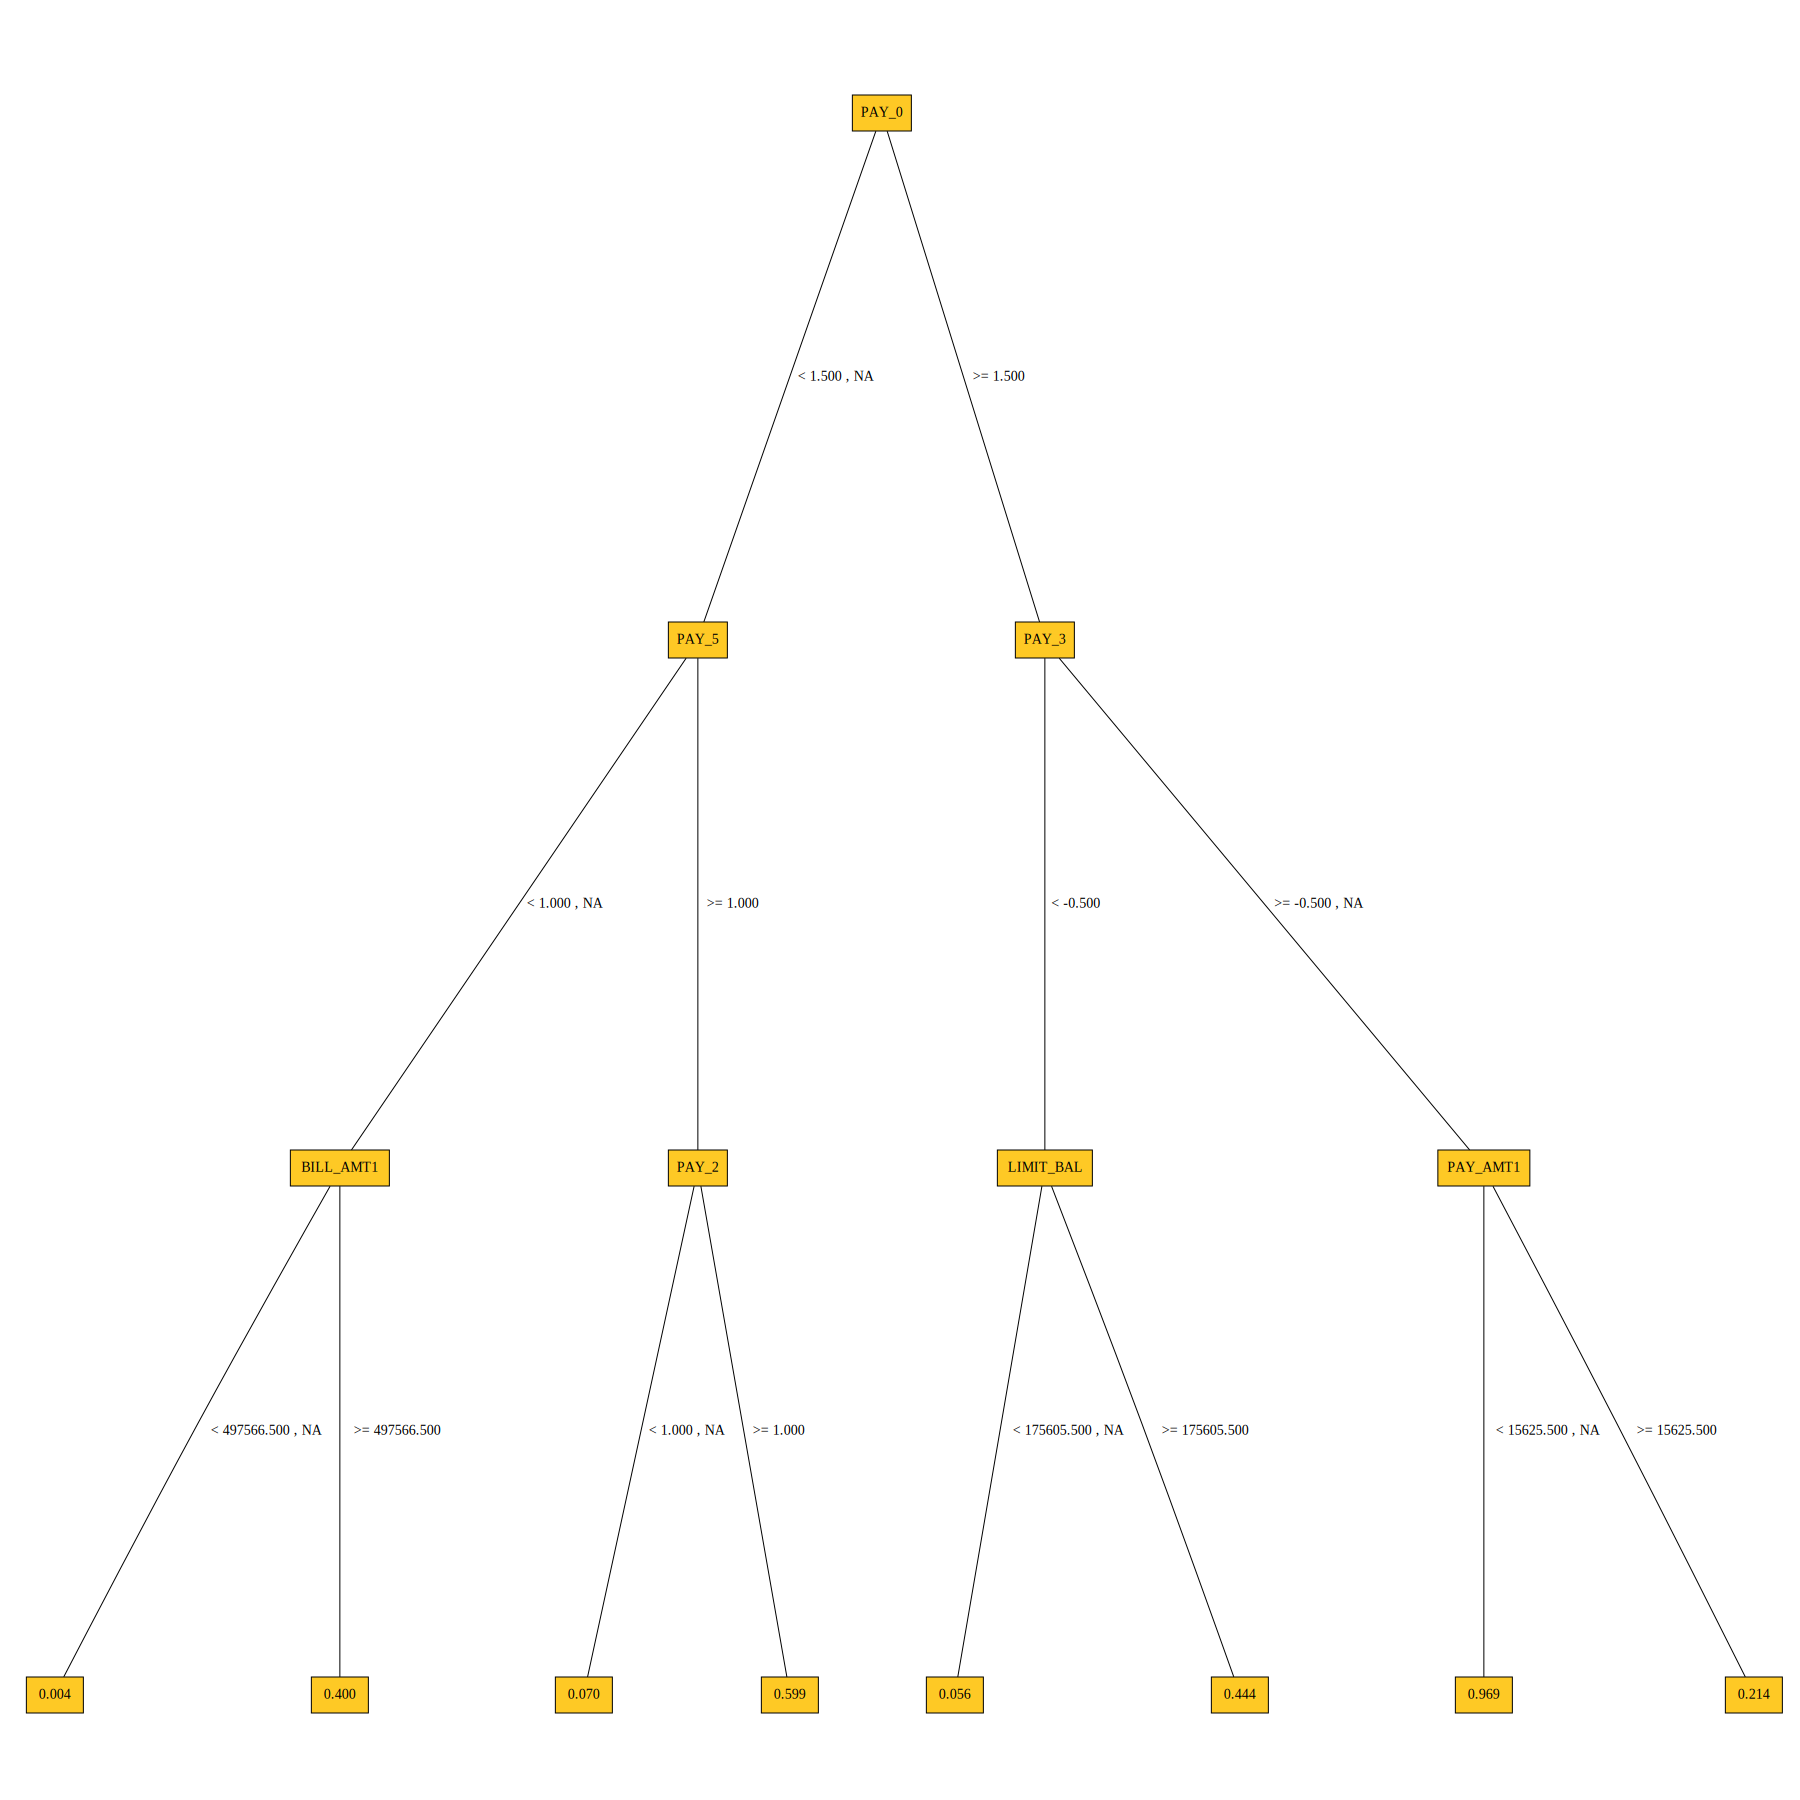

In [9]:
result.plot()

# show plot in a separate view
# result.plot().render(view=True)

### Save the explainer log and data

In [10]:
# save the explainer log
result.log(path="./dt-surrogate-demo.log")

In [11]:
!head dt-surrogate-demo.log

2023-03-12 23:09:42,047 INFO Surrogate decision tree 1753602f-35f6-40ef-b62f-7a2e5241fb6c/4900ed82-8ead-4191-be69-8dd239704409: BEGIN calculation
2023-03-12 23:09:42,047 INFO Surrogate decision tree 1753602f-35f6-40ef-b62f-7a2e5241fb6c/4900ed82-8ead-4191-be69-8dd239704409: dataset (10000, 25) loaded
2023-03-12 23:09:42,047 INFO Surrogate decision tree 1753602f-35f6-40ef-b62f-7a2e5241fb6c/4900ed82-8ead-4191-be69-8dd239704409: sampling down to 0 rows...
2023-03-12 23:09:42,200 INFO Surrogate decision tree 1753602f-35f6-40ef-b62f-7a2e5241fb6c/4900ed82-8ead-4191-be69-8dd239704409: connecting to H2O-3 server: localhost:59443
2023-03-12 23:09:45,561 INFO Surrogate decision tree 1753602f-35f6-40ef-b62f-7a2e5241fb6c/4900ed82-8ead-4191-be69-8dd239704409: DONE calculation


In [12]:
# save the explainer data
result.zip(file_path="./dt-surrogate-demo-archive.zip")

In [13]:
!unzip -l dt-surrogate-demo-archive.zip

Archive:  dt-surrogate-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     5284  2023-03-12 23:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_4900ed82-8ead-4191-be69-8dd239704409/result_descriptor.json
     1925  2023-03-12 23:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_4900ed82-8ead-4191-be69-8dd239704409/work/dt-class-0.dot
    61638  2023-03-12 23:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_4900ed82-8ead-4191-be69-8dd239704409/work/dtModel.json
  1004758  2023-03-12 23:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_4900ed82-8ead-4191-be69-8dd239704409/work/dtPathsFrame.csv
     8711  2023-03-12 23:09   explainer_h2o_sonar_explainers_dt_surrogate_explainer_DecisionTreeSurrogateExplainer_4900ed82-8ead-4191-be69-8dd239704409/work/dt-class-0.dot.pdf
     3133  2023-03-12 2